# Project 2. HMM 적용하여 데이터 모델링 해보기 (자유주제)

## Hidden Markov Model

* 은닉마코프모델 계산 및 구현
  * https://ratsgo.github.io/machine%20learning/2017/10/14/computeHMMs/
* https://web.stanford.edu/~jurafsky/slp3/A.pdf
  
## ~~Taxi Service Trajectory (TST)~~
* Taxi Service Trajectory (TST) Prediction Challenge 2015
  * http://www.geolink.pt/ecmlpkdd2015-challenge/index.html
  * Artificial Neural Networks Applied to Taxi Destination Prediction
    * https://arxiv.org/pdf/1508.00021.pdf
  
## Human Activity Recognition (HAR)
* ~~Smartphone Dataset for Human Activity Recognition (HAR) in Ambient Assisted Living (AAL) Data Set~~
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Smartphone+Dataset+for+Human+Activity+Recognition+%28HAR%29+in+Ambient+Assisted+Living+%28AAL%29)
  * Author
    * *Kadian Alicia Davis, Evans Boateng Owusu* 
  * Structure
    * Triaxial acceleration from the accelerometer (total acceleration)
      * `final_acc_train.txt`, `final_acc_test.txt`
    * Triaxial Angular velocity from the gyroscope. 
      * `final_gyro_train.txt`, `final_gyro_test.txt` 
    * A 561-feature vector with time and frequency domain variables 
      * `final_X_train.txt`, `final_X_test.txt`
    * The corresponding activity labels
      * `final_y_train.txt`, `final_y_test.txt`
* **Human Activity Recognition Using Smartphones Data Set**
  * [Dataset](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)
  * Author
    * *Jorge L. Reyes-Ortiz, Davide Anguita, Alessandro Ghio, Luca Oneto and Xavier Parra*
  * Structure
    * Raw Data
      * `acc_exp#{1~61}_user{1~30}.txt`
      * `gyro_exp#{1~61}_user{1~30}.txt`
      * `labels.txt`

In [1]:
from scipy import io
from hmmlearn import hmm

import matplotlib.pyplot as plt
import numpy as np
import time

labels = np.loadtxt('./HAR/RawData/labels.txt', delimiter=' ', dtype=int)
N = len(labels)

acc = np.empty((N), dtype=object)
gyro = np.empty((N), dtype=object)

y = np.empty((N),dtype=int)

actions =['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
          'STANDING', 'LAYING', 'STAND_TO_SIT', 'SIT_TO_STAND', 'SIT_TO_LIE', 
          'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']
num_actions = len(actions)

In [2]:
prev = ''
acc_file = np.empty([])
gyro_file = np.empty([])
for (i, row) in enumerate(labels):
    filename = 'exp{:02d}_user{:02d}.txt'.format(row[0], row[1])
    
    if prev != filename:
        acc_file = np.loadtxt('./HAR/RawData/acc_' + filename, delimiter=' ')
        gyro_file = np.loadtxt('./HAR/RawData/gyro_' + filename, delimiter=' ')
        prev = filename
        print(filename)
    
    acc[i] = acc_file[row[3]:row[4]+1, :]
    gyro[i] = gyro_file[row[3]:row[4]+1, :]
    y[i] = row[2]-1

exp01_user01.txt
exp02_user01.txt
exp03_user02.txt
exp04_user02.txt
exp05_user03.txt
exp06_user03.txt
exp07_user04.txt
exp08_user04.txt
exp09_user05.txt
exp10_user05.txt
exp11_user06.txt
exp12_user06.txt
exp13_user07.txt
exp14_user07.txt
exp15_user08.txt
exp16_user08.txt
exp17_user09.txt
exp18_user09.txt
exp19_user10.txt
exp20_user10.txt
exp21_user10.txt
exp22_user11.txt
exp23_user11.txt
exp24_user12.txt
exp25_user12.txt
exp26_user13.txt
exp27_user13.txt
exp28_user14.txt
exp29_user14.txt
exp30_user15.txt
exp31_user15.txt
exp32_user16.txt
exp33_user16.txt
exp34_user17.txt
exp35_user17.txt
exp36_user18.txt
exp37_user18.txt
exp38_user19.txt
exp39_user19.txt
exp40_user20.txt
exp41_user20.txt
exp42_user21.txt
exp43_user21.txt
exp44_user22.txt
exp45_user22.txt
exp46_user23.txt
exp47_user23.txt
exp48_user24.txt
exp49_user24.txt
exp50_user25.txt
exp51_user25.txt
exp52_user26.txt
exp53_user26.txt
exp54_user27.txt
exp55_user27.txt
exp56_user28.txt
exp57_user28.txt
exp58_user29.txt
exp59_user29.t

In [3]:
for i in range(N):
    print(acc[i].shape, gyro[i].shape, actions[y[i]])

(983, 3) (983, 3) STANDING
(160, 3) (160, 3) STAND_TO_SIT
(802, 3) (802, 3) SITTING
(165, 3) (165, 3) SIT_TO_STAND
(1015, 3) (1015, 3) STANDING
(288, 3) (288, 3) STAND_TO_LIE
(876, 3) (876, 3) LAYING
(197, 3) (197, 3) LIE_TO_SIT
(932, 3) (932, 3) SITTING
(192, 3) (192, 3) SIT_TO_LIE
(927, 3) (927, 3) LAYING
(191, 3) (191, 3) LIE_TO_STAND
(583, 3) (583, 3) WALKING
(895, 3) (895, 3) WALKING
(911, 3) (911, 3) WALKING
(965, 3) (965, 3) WALKING
(656, 3) (656, 3) WALKING_DOWNSTAIRS
(631, 3) (631, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(666, 3) (666, 3) WALKING_UPSTAIRS
(624, 3) (624, 3) WALKING_DOWNSTAIRS
(673, 3) (673, 3) WALKING_UPSTAIRS
(976, 3) (976, 3) STANDING
(206, 3) (206, 3) STAND_TO_SIT
(789, 3) (789, 3) SITTING
(156, 3) (156, 3) SIT_TO_STAND
(927, 3) (927, 3) STANDING
(268, 3) (268, 3) STAND_TO_LIE
(863, 3) (863, 3) LAYING
(184, 3) (184, 3) LIE_TO_SIT
(833, 3) (833, 3) SITTING
(237, 3) (237, 3) SIT_TO_LIE
(778, 3) (778, 3) LAYING
(242, 3) (242, 3) LIE_TO_STAND
(6

In [5]:
obs = np.empty((N), dtype=object)
origin_data = np.empty((N, 3), dtype=object)

def get_observation(acc, gyro):
    time = acc.shape[0]
    obs = np.empty((time), dtype=int)
    for t in range(time):
        jerkNum = accNum = gyroNum = 0
        jerk = np.zeros((3), dtype=float)
        for i in range(3):
            if t > 0:
                jerk[i] = acc[t, i] - acc[t-1, i]
                
            if jerk[i] > 0:
                jerkNum += (1 << (2-i))
            if acc[t, i] > 0:
                accNum += (1 << (2-i))
            if gyro[t, i] > 0:
                gyroNum += (1 << (2-i))
                
#         acc8vel8
#         obs[t] = accNum*8 + gyroNum

#         jerk8acc8
#         obs[t] = jerkNum*8 + accNum

#         jerk8vel8
#         obs[t] = jerkNum*8 + gyroNum

#         jerk8acc2vel8
        obs[t] = jerkNum*16 + gyroNum
        if acc[t, 2] > 0:
            obs[t] += 8
    return obs

for i in range(N):
    obs[i] = get_observation(acc[i], gyro[i])
    origin_data[i] = [y[i], obs[i], i]

print(origin_data.shape)

(1214, 3)


## train_test_split
* `train_size : test_size = 90 : 10`

In [6]:
from sklearn.model_selection import train_test_split

# train, test split
train_data, test_data = train_test_split(origin_data, test_size=0.1)

# sort in charlabel
train_data = train_data[train_data[:, 0].argsort()]
test_data = test_data[test_data[:, 0].argsort()]

print('train:', train_data.shape)
print('test:', test_data.shape)
print(test_data)

train: (1092, 3)
test: (122, 3)
[[0 array([35, 35, 35, ..., 38, 38, 54]) 506]
 [0
  array([39, 39, 39, 47, 47, 47, 47, 46, 42, 58, 58, 58, 58, 42, 43, 43, 41,
       41, 45, 39, 39, 39, 35, 49, 49, 36, 38, 38, 38, 38, 38, 38, 46, 60,
       60, 60, 60, 62, 63, 63, 45, 45, 45, 61, 60, 52, 36, 36, 38, 44, 45,
       61, 55, 51, 51, 51, 59, 59, 43, 43, 43, 40, 40, 40, 56, 56, 58, 43,
       41, 37, 37, 39, 39, 35, 51, 50, 48, 36, 36, 38, 38, 38, 42, 58, 60,
       60, 60, 60, 45, 45, 45, 45, 45, 44, 52, 52, 52, 36, 32, 37, 45, 47,
       47, 51, 51, 51, 51, 59, 59, 43, 41, 40, 40, 40, 40, 40, 56, 40, 41,
       37, 39, 35, 39, 37, 49, 53, 52, 36, 36, 36, 38, 38, 38, 62, 60, 60,
       60, 62, 63, 63, 45, 45, 45, 61, 53, 36, 36, 36, 34, 45, 45, 39, 39,
       55, 51, 51, 51, 59, 59, 59, 56, 56, 40, 40, 40, 40, 42, 43, 43, 33,
       35, 35, 33, 33, 33, 34, 34, 38, 38, 38, 36, 36, 60, 60, 60, 60, 62,
       63, 63, 63, 61, 44, 60, 60, 60, 36, 36, 36, 36, 44, 36, 39, 39, 39,
       55, 59, 5

In [19]:
idx = np.zeros(num_actions + 1, dtype=int)
for i in range(train_data.shape[0]):
    idx[train_data[i][0]+1] = i+1;

# Human Activity Recognition HMM
## HMM Learn
* `hmmlearn` Tutorial
  * https://hmmlearn.readthedocs.io/en/latest/tutorial.html
* `MultinomialHMM` API Reference
  * https://hmmlearn.readthedocs.io/en/latest/api.html#multinomialhmm

In [15]:
models = np.empty((num_actions), dtype=object)
for i in range(num_actions):
    models[i] = hmm.MultinomialHMM(n_components=64, verbose=False, n_iter=50)

# multinomial HMM learn
for i in range(num_actions):
    start_time = time.time()
    trainRange = range(idx[i], idx[i+1])
    print('Training', actions[i], 'model w.', idx[i+1]-idx[i], 'examples', end=' ')

    trainX = np.concatenate([train_data[j][1].reshape(-1, 1) for j in trainRange])
    lengths = [len(train_data[j][1]) for j in trainRange]

    models[i].fit(trainX, lengths)
    print("(elapsed time: {}s).".format(time.time() - start_time))

Training WALKING model w. 117 examples 

         1     -468275.8570             +nan
         2     -356618.6474     +111657.2097
         3     -356393.5111        +225.1362
         4     -356114.9704        +278.5407
         5     -355733.7572        +381.2132
         6     -355157.0342        +576.7230
         7     -354183.0895        +973.9447
         8     -352298.2906       +1884.7989
         9     -347882.4742       +4415.8163
        10     -334774.8760      +13107.5982
        11     -303365.4396      +31409.4364
        12     -271874.5450      +31490.8946
        13     -253797.8182      +18076.7268
        14     -243548.6999      +10249.1183
        15     -236709.3818       +6839.3181
        16     -231679.0704       +5030.3113
        17     -227499.9567       +4179.1137
        18     -223615.8306       +3884.1261
        19     -220030.2184       +3585.6123
        20     -216835.4128       +3194.8055
        21     -214075.9766       +2759.4362
        22     -211813.1879       +2262.7887
        23

(elapsed time: 3876.995486974716s).
Training WALKING_UPSTAIRS model w. 168 examples 

         1     -451213.5401             +nan
         2     -304708.7952     +146504.7450
         3     -304154.6733        +554.1219
         4     -303307.0317        +847.6417
         5     -301695.3602       +1611.6714
         6     -297668.9000       +4026.4602
         7     -283977.0666      +13691.8334
         8     -250568.5421      +33408.5245
         9     -216493.5183      +34075.0239
        10     -193990.1802      +22503.3381
        11     -181948.4424      +12041.7378
        12     -175541.4599       +6406.9824
        13     -170392.8688       +5148.5911
        14     -166282.4128       +4110.4560
        15     -162821.2438       +3461.1690
        16     -159898.8352       +2922.4086
        17     -157461.9260       +2436.9092
        18     -155198.5911       +2263.3349
        19     -152330.4127       +2868.1784
        20     -149921.0525       +2409.3602
        21     -148695.1846       +1225.8679
        22     -147738.9869        +956.1977
        23

(elapsed time: 3704.829852581024s).
Training WALKING_DOWNSTAIRS model w. 170 examples 

         1     -412533.5098             +nan
         2     -317224.3599      +95309.1499
         3     -317027.3553        +197.0046
         4     -316779.8301        +247.5253
         5     -316431.8925        +347.9376
         6     -315881.5241        +550.3684
         7     -314880.2219       +1001.3022
         8     -312696.5557       +2183.6662
         9     -307235.9445       +5460.6111
        10     -296543.7446      +10692.1999
        11     -280994.7260      +15549.0186
        12     -262401.9787      +18592.7473
        13     -244727.4347      +17674.5440
        14     -229240.0740      +15487.3607
        15     -218827.1701      +10412.9039
        16     -211056.7455       +7770.4246
        17     -204715.5295       +6341.2160
        18     -200534.6121       +4180.9174
        19     -197649.0961       +2885.5160
        20     -195413.6817       +2235.4145
        21     -193533.3292       +1880.3524
        22     -192097.5184       +1435.8108
        23

(elapsed time: 3408.616759777069s).
Training SITTING model w. 102 examples 

         1     -449945.6213             +nan
         2     -315077.0717     +134868.5495
         3     -314651.5004        +425.5713
         4     -313968.6345        +682.8659
         5     -312463.3215       +1505.3129
         6     -307229.0806       +5234.2409
         7     -285783.4396      +21445.6410
         8     -246895.4115      +38888.0281
         9     -214516.8010      +32378.6105
        10     -192649.9914      +21866.8096
        11     -182416.0652      +10233.9261
        12     -176492.4519       +5923.6134
        13     -171143.0090       +5349.4429
        14     -167129.4205       +4013.5885
        15     -164794.4864       +2334.9341
        16     -163598.9500       +1195.5363
        17     -162778.6855        +820.2646
        18     -161957.8032        +820.8823
        19     -161146.8436        +810.9596
        20     -160310.3278        +836.5158
        21     -159667.8022        +642.5256
        22     -159306.7139        +361.0883
        23

(elapsed time: 3681.860481262207s).
Training STANDING model w. 102 examples 

         1     -485774.9903             +nan
         2     -350501.4511     +135273.5392
         3     -350099.6853        +401.7658
         4     -349521.5934        +578.0920
         5     -348504.9218       +1016.6715
         6     -346223.7060       +2281.2158
         7     -339347.4719       +6876.2341
         8     -316448.4426      +22899.0293
         9     -275548.8345      +40899.6081
        10     -243214.7801      +32334.0545
        11     -220019.2029      +23195.5772
        12     -199838.5703      +20180.6325
        13     -185992.8120      +13845.7583
        14     -178459.2054       +7533.6066
        15     -173626.2538       +4832.9516
        16     -170645.0067       +2981.2471
        17     -168861.4698       +1783.5369
        18     -167616.1455       +1245.3243
        19     -166437.5454       +1178.6001
        20     -165633.5968        +803.9486
        21     -165102.4233        +531.1735
        22     -164703.3186        +399.1047
        23

(elapsed time: 4011.799980163574s).
Training LAYING model w. 110 examples 

         1     -518544.1476             +nan
         2     -376933.1275     +141611.0201
         3     -376615.8264        +317.3011
         4     -376176.2343        +439.5921
         5     -375460.4417        +715.7926
         6     -374075.8624       +1384.5793
         7     -370833.8714       +3241.9910
         8     -361912.3047       +8921.5667
         9     -339164.0395      +22748.2652
        10     -299433.1371      +39730.9024
        11     -258039.3638      +41393.7732
        12     -231744.6931      +26294.6707
        13     -217237.3893      +14507.3038
        14     -208855.9217       +8381.4675
        15     -204299.4533       +4556.4685
        16     -200290.6315       +4008.8218
        17     -197713.1562       +2577.4753
        18     -196442.4667       +1270.6895
        19     -195428.2029       +1014.2638
        20     -194605.7843        +822.4186
        21     -193995.9765        +609.8078
        22     -193538.0850        +457.8915
        23

(elapsed time: 3956.0335268974304s).
Training STAND_TO_SIT model w. 55 examples 

         1      -39465.7728             +nan
         2      -29942.6439       +9523.1289
         3      -29886.8054         +55.8385
         4      -29799.5586         +87.2468
         5      -29630.2865        +169.2721
         6      -29212.6816        +417.6050
         7      -27925.1995       +1287.4820
         8      -24342.9175       +3582.2821
         9      -19796.0847       +4546.8328
        10      -16515.6886       +3280.3961
        11      -14185.7344       +2329.9542
        12      -12348.4189       +1837.3156
        13      -11320.6732       +1027.7457
        14      -10530.6040        +790.0691
        15      -10047.8434        +482.7606
        16       -9733.8506        +313.9928
        17       -9581.0143        +152.8363
        18       -9505.9618         +75.0525
        19       -9457.0010         +48.9608
        20       -9417.5690         +39.4319
        21       -9380.1338         +37.4352
        22       -9338.5706         +41.5632
        23

(elapsed time: 305.054158449173s).
Training SIT_TO_STAND model w. 57 examples 

         1      -31213.1828             +nan
         2      -22000.9081       +9212.2747
         3      -21939.1571         +61.7510
         4      -21829.2595        +109.8977
         5      -21575.4263        +253.8331
         6      -20846.2977        +729.1287
         7      -18780.8196       +2065.4781
         8      -15647.4648       +3133.3548
         9      -12225.2629       +3422.2019
        10       -9624.3064       +2600.9565
        11       -8261.3345       +1362.9719
        12       -7741.1998        +520.1347
        13       -7503.4534        +237.7464
        14       -7294.4824        +208.9710
        15       -7176.6557        +117.8268
        16       -7085.7830         +90.8727
        17       -7011.4139         +74.3691
        18       -6952.8314         +58.5825
        19       -6894.4495         +58.3819
        20       -6844.4184         +50.0311
        21       -6781.8858         +62.5326
        22       -6729.3748         +52.5109
        23

(elapsed time: 221.56788611412048s).
Training SIT_TO_LIE model w. 53 examples 

         1      -46038.5699             +nan
         2      -33285.4589      +12753.1109
         3      -33218.6513         +66.8077
         4      -33112.0199        +106.6314
         5      -32903.1253        +208.8946
         6      -32401.4680        +501.6573
         7      -30901.4415       +1500.0265
         8      -27362.0917       +3539.3498
         9      -23019.0333       +4343.0583
        10      -19191.1123       +3827.9210
        11      -16995.7933       +2195.3190
        12      -15491.6024       +1504.1908
        13      -14211.3647       +1280.2377
        14      -13389.9430        +821.4217
        15      -12979.5910        +410.3519
        16      -12637.3835        +342.2075
        17      -12411.8618        +225.5217
        18      -12318.1286         +93.7333
        19      -12263.2394         +54.8892
        20      -12217.8264         +45.4129
        21      -12176.8557         +40.9708
        22      -12138.7419         +38.1137
        23

(elapsed time: 370.2914688587189s).
Training LIE_TO_SIT model w. 53 examples 

         1      -41455.9138             +nan
         2      -28714.7987      +12741.1152
         3      -28613.3866        +101.4121
         4      -28423.5517        +189.8349
         5      -27964.0691        +459.4826
         6      -26655.4091       +1308.6600
         7      -23429.5847       +3225.8244
         8      -20092.0729       +3337.5118
         9      -17406.6621       +2685.4108
        10      -14926.5629       +2480.0992
        11      -13186.8424       +1739.7205
        12      -12152.4585       +1034.3839
        13      -11520.0867        +632.3718
        14      -11086.2237        +433.8630
        15      -10855.0087        +231.2151
        16      -10685.4617        +169.5470
        17      -10493.2284        +192.2333
        18      -10192.0464        +301.1820
        19      -10033.7674        +158.2790
        20       -9945.2099         +88.5575
        21       -9889.0960         +56.1139
        22       -9837.0644         +52.0316
        23

(elapsed time: 331.27107095718384s).
Training STAND_TO_LIE model w. 53 examples 

         1      -53783.7322             +nan
         2      -40672.6734      +13111.0588
         3      -40586.4435         +86.2299
         4      -40447.0328        +139.4107
         5      -40167.6545        +279.3783
         6      -39475.9072        +691.7473
         7      -37405.1025       +2070.8047
         8      -33157.5655       +4247.5370
         9      -28400.3678       +4757.1977
        10      -23754.8415       +4645.5262
        11      -20959.4765       +2795.3651
        12      -19160.4877       +1798.9888
        13      -17578.5910       +1581.8967
        14      -16679.8699        +898.7210
        15      -16377.9040        +301.9659
        16      -16136.7718        +241.1322
        17      -15948.0082        +188.7636
        18      -15728.0453        +219.9629
        19      -15472.7298        +255.3155
        20      -15301.9401        +170.7897
        21      -15177.7980        +124.1421
        22      -15061.5836        +116.2144
        23

(elapsed time: 428.47260451316833s).
Training LIE_TO_STAND model w. 52 examples 

         1      -40293.4739             +nan
         2      -30245.6996      +10047.7743
         3      -30173.8722         +71.8274
         4      -30055.9238        +117.9484
         5      -29817.9818        +237.9419
         6      -29230.8076        +587.1742
         7      -27471.7321       +1759.0756
         8      -24087.3634       +3384.3687
         9      -20831.5653       +3255.7981
        10      -17512.1184       +3319.4468
        11      -14993.8745       +2518.2439
        12      -13434.7846       +1559.0898
        13      -12528.9874        +905.7973
        14      -11854.7071        +674.2803
        15      -11486.6336        +368.0734
        16      -11285.6799        +200.9537
        17      -11143.5182        +142.1617
        18      -10980.7300        +162.7882
        19      -10845.3609        +135.3691
        20      -10767.6346         +77.7263
        21      -10698.5536         +69.0810
        22      -10634.2357         +64.3178
        23

(elapsed time: 326.9073598384857s).


        50      -10045.4167          +2.6757


In [37]:
def test_hmm_models(hmm_models):
    testSize = test_data.shape[0]
    wrongCases = 0

    print('=================== Wrong Cases ===================')
    for i in range(testSize):
        testX = np.concatenate([test_data[i][1].reshape(-1, 1)])

        maxScore = hmm_models[0].score(testX)
        maxAction = 0

        for action in range(num_actions):
            score = hmm_models[action].score(testX)
            if maxScore < score:
                maxScore = score
                maxAction = action

        if not test_data[i][0] == maxAction:
            print(actions[test_data[i][0]], actions[maxAction], maxScore, test_data[i][0] == maxAction)
            wrongCases += 1
            
            expect = origin_data[test_data[i][2]][1]
            result = origin_data[train_data[idx[maxAction]][2]][1]
            
            ax1 = plt.subplot('211')
            ax1.set_ylabel('state')
            ax1.set_title('{} vs. {}'.format(actions[test_data[i][0]], actions[maxAction]))
            plt.plot(expect)
            
            ax2 = plt.subplot('212', sharex=ax1, sharey=ax1)
            ax2.set_ylabel('state')
            ax2.set_xlabel('time')
            plt.plot(result)
            
            plt.show()

    print('(Wrong, Total)', (wrongCases, testSize))
    print('Accuracy: {}%'.format((1 - wrongCases/testSize) * 100))

In [17]:
import pickle
import os
def save_hmm_models(models, name):
    if os.path.exists(name):
        os.system("rm -rf " + name)
    os.mkdir(name)
    for i in range(num_actions):
        filename = './{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'wb') as file: pickle.dump(models[i], file)
        print('Save', filename)

In [53]:
save_hmm_models(models, 'acc8vel8iter50')

Save ./acc8vel8iter50/acc8vel8iter50_00_WALKING.pkl
Save ./acc8vel8iter50/acc8vel8iter50_01_WALKING_UPSTAIRS.pkl
Save ./acc8vel8iter50/acc8vel8iter50_02_WALKING_DOWNSTAIRS.pkl
Save ./acc8vel8iter50/acc8vel8iter50_03_SITTING.pkl
Save ./acc8vel8iter50/acc8vel8iter50_04_STANDING.pkl
Save ./acc8vel8iter50/acc8vel8iter50_05_LAYING.pkl
Save ./acc8vel8iter50/acc8vel8iter50_06_STAND_TO_SIT.pkl
Save ./acc8vel8iter50/acc8vel8iter50_07_SIT_TO_STAND.pkl
Save ./acc8vel8iter50/acc8vel8iter50_08_SIT_TO_LIE.pkl
Save ./acc8vel8iter50/acc8vel8iter50_09_LIE_TO_SIT.pkl
Save ./acc8vel8iter50/acc8vel8iter50_10_STAND_TO_LIE.pkl
Save ./acc8vel8iter50/acc8vel8iter50_11_LIE_TO_STAND.pkl


In [9]:
import pickle
def load_hmm_models(name):
    hmm_models = []
    for i in range(num_actions):
        filename = './{}/{}_{:02d}_{}.pkl'.format(name, name, i, actions[i])
        with open(filename, 'rb') as file: hmm_models.append(pickle.load(file))
        print('Open', filename)
    return hmm_models

Open ./acc8vel8iter50/acc8vel8iter50_00_WALKING.pkl
Open ./acc8vel8iter50/acc8vel8iter50_01_WALKING_UPSTAIRS.pkl
Open ./acc8vel8iter50/acc8vel8iter50_02_WALKING_DOWNSTAIRS.pkl
Open ./acc8vel8iter50/acc8vel8iter50_03_SITTING.pkl
Open ./acc8vel8iter50/acc8vel8iter50_04_STANDING.pkl
Open ./acc8vel8iter50/acc8vel8iter50_05_LAYING.pkl
Open ./acc8vel8iter50/acc8vel8iter50_06_STAND_TO_SIT.pkl
Open ./acc8vel8iter50/acc8vel8iter50_07_SIT_TO_STAND.pkl
Open ./acc8vel8iter50/acc8vel8iter50_08_SIT_TO_LIE.pkl
Open ./acc8vel8iter50/acc8vel8iter50_09_LIE_TO_SIT.pkl
Open ./acc8vel8iter50/acc8vel8iter50_10_STAND_TO_LIE.pkl
Open ./acc8vel8iter50/acc8vel8iter50_11_LIE_TO_STAND.pkl
=================== Wrong Cases ===================
SITTING STANDING -1831.2377137911633 False


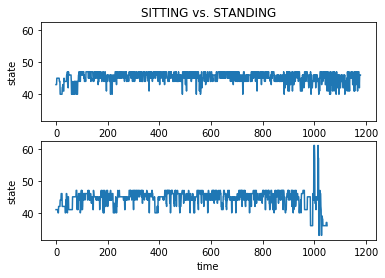

SITTING STANDING -1642.0398878264227 False


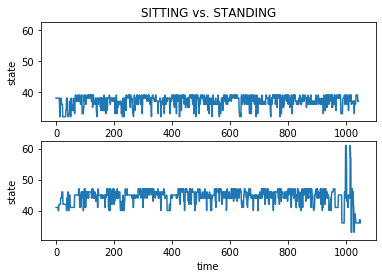

SITTING STANDING -1076.062357540761 False


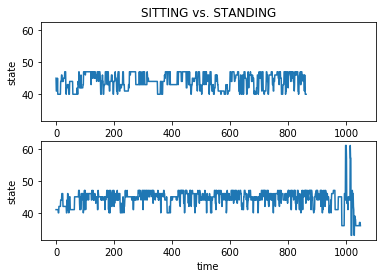

SITTING STANDING -1548.3217601864283 False


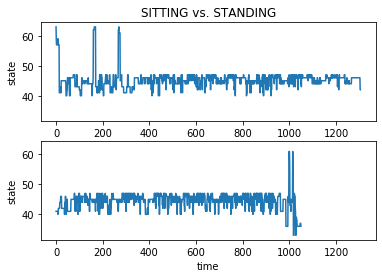

SITTING STANDING -1428.5890072836985 False


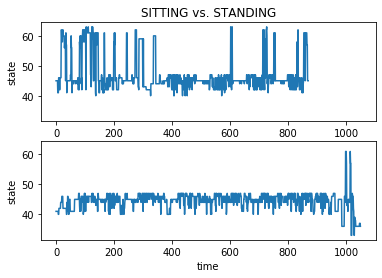

SIT_TO_STAND STAND_TO_SIT -105.8773443034097 False


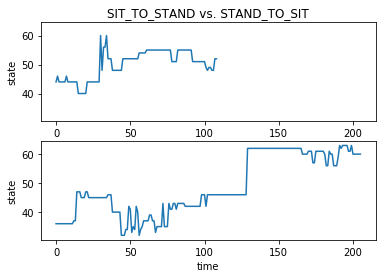

LIE_TO_SIT LIE_TO_STAND -212.67516426968723 False


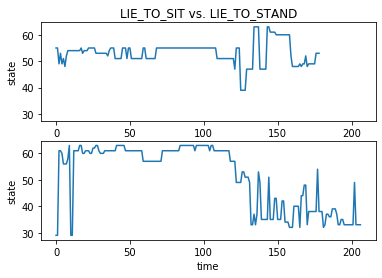

STAND_TO_LIE STAND_TO_SIT -376.3769555622246 False


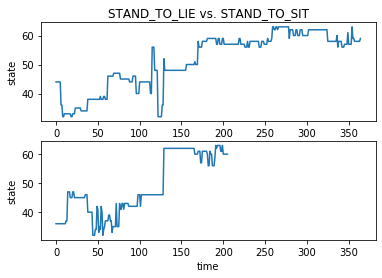

STAND_TO_LIE LIE_TO_STAND -249.59297042464544 False


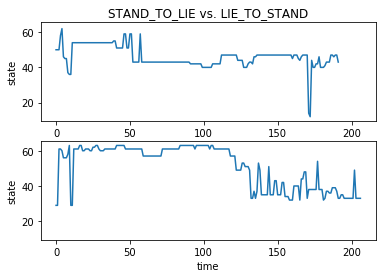

(Wrong, Total) (9, 122)
Accuracy: 92.62295081967213%


In [38]:
new_models = load_hmm_models('acc8vel8iter50')
# new_models = load_hmm_models('jerk8acc8iter1')
test_hmm_models(new_models)